In [1]:
import google.datalab.bigquery as bq
import pandas as pd
airline = bq.Query('SELECT * FROM `mk672.sentiment`')
df = airline.execute(output_options=bq.QueryOutput.dataframe()).result()
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.695420e+17,negative,0.6809,longlines,0.3511,Delta,,KShay1985,,0,"""@JetBlue this is ridiculous we are on 1.5 hou...",,2015-02-22 08:59:00,"""New York City, NY""",
1,5.689210e+17,negative,0.6530,longlines,0.3513,Delta,,noplasticshower,,0,.@JetBlue i'm sorry. Boarding chaos is underw...,,2015-02-20 15:51:00,planet earth,
2,5.695740e+17,negative,0.6334,longlines,0.3342,Delta,,DonnellyVJ,,0,@JetBlue still waiting to board and see if the...,,2015-02-22 11:04:00,,
3,5.699220e+17,negative,0.6875,Bad Flight,0.6875,Delta,,jsstone75,,0,@JetBlue what else on this plane is duct-taped...,,2015-02-23 10:09:00,nyc,
4,5.695720e+17,negative,0.6617,Bad Flight,0.6617,Delta,,DonnellyVJ,,0,@JetBlue our flight out no Tv. Now our flight ...,"""[32.73346632, -117.20410937]""",2015-02-22 10:57:00,,


In [2]:
positive = df['airline_sentiment'].str.contains("positive")
negative = df['airline_sentiment'].str.contains("negative")
neutral = df['airline_sentiment'].str.contains("neutral")

In [3]:
positive_tweets = df[positive]
positive_tweets.shape

(2354, 15)

In [4]:
negative_tweets = df[negative]
negative_tweets.shape

(9159, 15)

In [5]:
neutral_tweets = df[neutral]
neutral_tweets.shape

(3091, 15)

In [6]:
airline_by_negativity = negative_tweets[['airline','airline_sentiment_confidence','negativereason']]
airline_by_negativity.head(20)

,airline,airline_sentiment_confidence,negativereason
0,Delta,0.6809,longlines
1,Delta,0.6530,longlines
2,Delta,0.6334,longlines
3,Delta,0.6875,Bad Flight
4,Delta,0.6617,Bad Flight
5,Delta,1.0000,Bad Flight
6,Delta,1.0000,Bad Flight
7,Delta,1.0000,Bad Flight
8,Delta,0.3730,Bad Flight
9,Delta,0.6421,Bad Flight


In [7]:
#Worst Airline by negativity
top_worst_airline = airline_by_negativity.groupby('airline', as_index=False).count()
top_worst_airline.sort_values('negativereason', ascending=False)

,airline,airline_sentiment_confidence,negativereason
4,United,2633,2633
3,US Airways,2263,2263
0,American,1941,1941
2,Southwest,1186,1186
1,Delta,955,955
5,Virgin America,181,181


In [8]:
airline_by_postivity = positive_tweets[['airline','airline_sentiment_confidence']]
top_best_airline = airline_by_postivity.groupby('airline', as_index=False).count()
top_best_airline.sort_values('airline_sentiment_confidence', ascending=False)

,airline,airline_sentiment_confidence
2,Southwest,570
1,Delta,544
4,United,492
0,American,327
3,US Airways,269
5,Virgin America,152


In [9]:
motivation_for_negativity = negative_tweets[['airline','negativereason']]
motivation_for_negativity_count = motivation_for_negativity.groupby('negativereason', as_index=False).count()
motivation_for_negativity_count.sort_values('negativereason', ascending=False)

,negativereason,airline
9,longlines,178
8,Lost Luggage,721
7,Late Flight,1660
6,Flight Booking Problems,529
5,Flight Attendant Complaints,480
4,Damaged Luggage,74
3,Customer Service Issue,2904
2,Cancelled Flight,843
1,Can't Tell,1190
0,Bad Flight,580


In [10]:
df.airline.value_counts()

United            3822
US Airways        2913
American          2723
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

/usr/local/envs/py2env/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


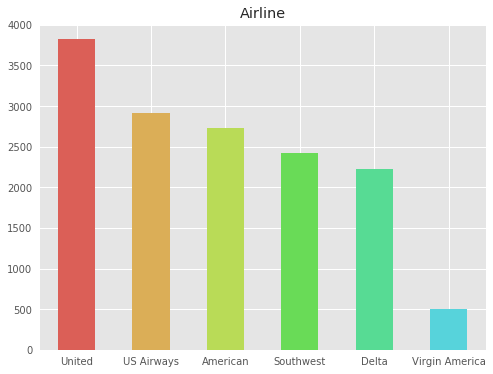

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
colors=sns.color_palette("hls", 10) 
pd.Series(df["airline"]).value_counts().plot(kind = "bar",color=colors,figsize=(8,6),fontsize=10,rot = 0, title = "Airline")

In [12]:
df.airline_sentiment.value_counts()

negative    9159
neutral     3091
positive    2354
Name: airline_sentiment, dtype: int64

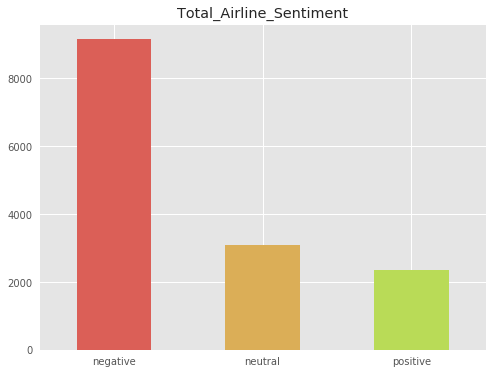

In [19]:
colors=sns.color_palette("hls", 10)
pd.Series(df["airline_sentiment"]).value_counts().plot(kind = "bar",color=colors,figsize=(8,6),rot=0, title = "Total_Airline_Sentiment")

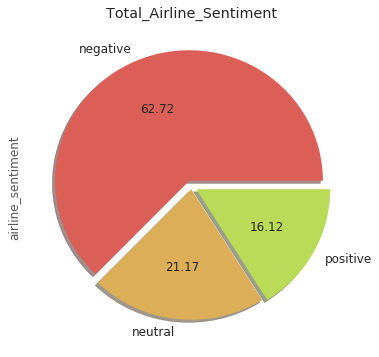

In [20]:
colors=sns.color_palette("hls", 10)
pd.Series(df["airline_sentiment"]).value_counts().plot(kind="pie",colors=colors,labels=["negative", "neutral", "positive"],explode=[0.05,0.02,0.04],shadow=True,autopct='%.2f', fontsize=12,figsize=(6, 6),title = "Total_Airline_Sentiment")

In [13]:
df.negativereason.value_counts()

                               5445
Customer Service Issue         2904
Late Flight                    1660
Can't Tell                     1190
Cancelled Flight                843
Lost Luggage                    721
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     480
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

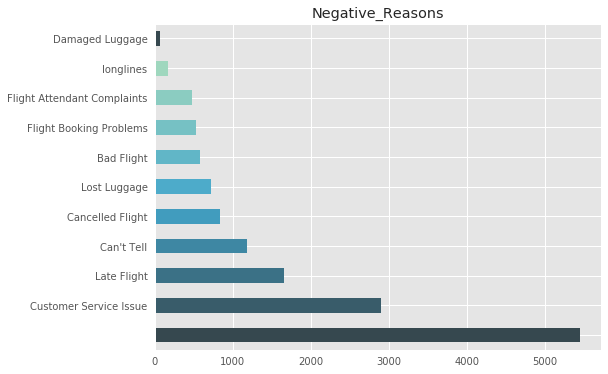

In [21]:
colors=sns.color_palette("GnBu_d", 10) 
pd.Series(df["negativereason"]).value_counts().plot(kind = "barh",color=colors,figsize=(8,6),title = "Negative_Reasons")

In [14]:
df.negativereason.value_counts().head(10)

                               5445
Customer Service Issue         2904
Late Flight                    1660
Can't Tell                     1190
Cancelled Flight                843
Lost Luggage                    721
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     480
longlines                       178
Name: negativereason, dtype: int64

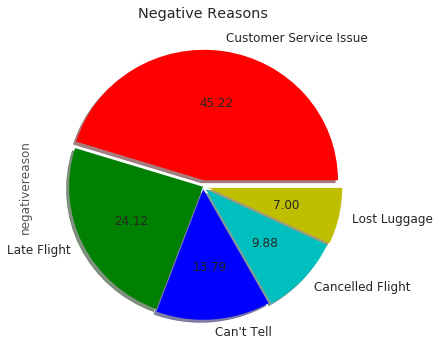

In [22]:
pd.Series(df["negativereason"]).value_counts().head(5).plot(kind="pie",labels=["Customer Service Issue", "Late Flight", "Can't Tell","Cancelled Flight","Lost Luggage"], colors=['r', 'g', 'b','c','y'],autopct='%.2f',explode=[0.05,0,0.02,0.03,0.04],shadow=True, fontsize=12,figsize=(6, 6),title="Negative Reasons")

In [16]:
df.tweet_location.value_counts().head(10)

                     4723
"Boston, MA"          157
"New York, NY"        156
"Washington, DC"      148
New York              127
USA                   125
Chicago               104
New York City          96
"Los Angeles, CA"      96
NYC                    95
Name: tweet_location, dtype: int64

In [19]:
df.user_timezone.value_counts().head(10)

                               4814
Eastern Time (US & Canada)     3738
Central Time (US & Canada)     1923
Pacific Time (US & Canada)     1206
Quito                           733
Atlantic Time (Canada)          496
Mountain Time (US & Canada)     366
Arizona                         228
London                          193
Alaska                          108
Name: user_timezone, dtype: int64

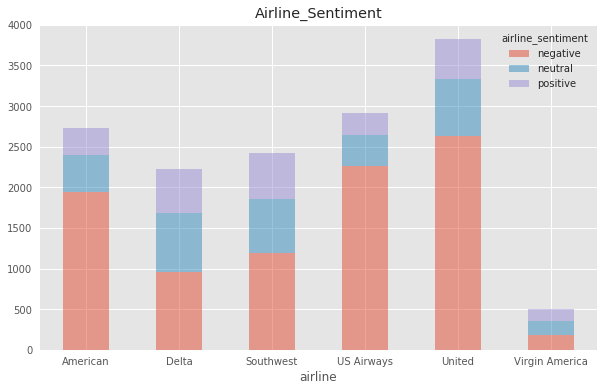

In [23]:
pd.crosstab(index = df["airline"],columns = df["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Airline_Sentiment")

In [20]:
air_sentiment=pd.crosstab(df.airline, df.airline_sentiment)
air_sentiment

airline_sentiment,negative,neutral,positive
airline,,,
American,1941,455,327
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [21]:
percentage=air_sentiment.apply(lambda a: a / a.sum() * 100, axis=1)
percentage

airline_sentiment,negative,neutral,positive
airline,,,
American,71.281675,16.709512,12.008814
Delta,42.979298,32.538254,24.482448
Southwest,49.008264,27.438017,23.553719
US Airways,77.686234,13.079300,9.234466
United,68.890633,18.236525,12.872841
Virgin America,35.912698,33.928571,30.158730


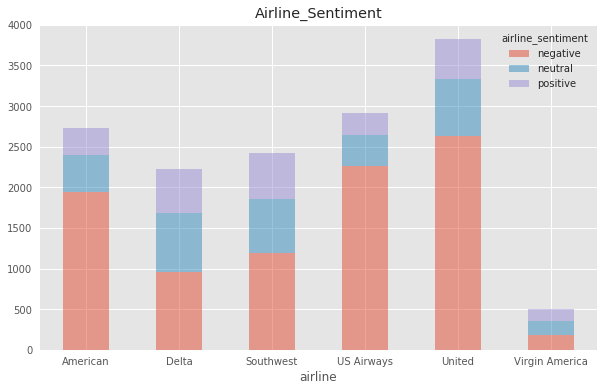

In [24]:
pd.crosstab(index = df["airline"],columns = df["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Airline_Sentiment")

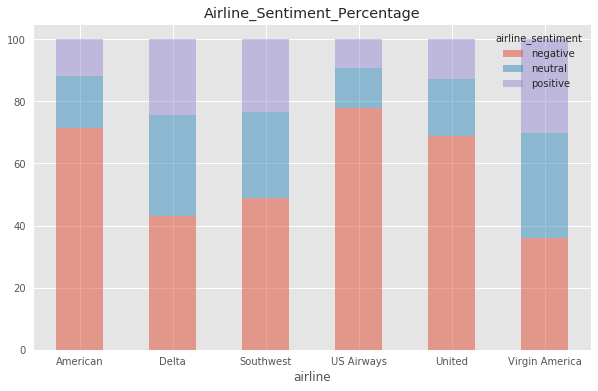

In [22]:
percentage.plot(kind='bar',figsize=(10, 6),alpha=0.5,
                rot=0,stacked=True,title="Airline_Sentiment_Percentage")

In [1]:
import nltk


nltk.download("punkt")


nltk.download("stopwords")


import string
string.punctuation


# Set the useless words:

useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)



def build_bag_of_words_features_filtered(words):
    return {
        word:1 for word in words \
        if not word in useless_words}

tokenized_negative_tweets = []
for text in negative_tweets['text']:
        tokenized_negative_tweets.append(nltk.word_tokenize(text))
        #negative_words.extend(nltk.word_tokenize(text)) 
        
tokenized_negative_tweets


negative_features = [
    (build_bag_of_words_features_filtered(text), 'neg') \
    for text in tokenized_negative_tweets
]


print(negative_features)

[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'negative_tweets' is not defined